In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# EDA

# Cargo mis archivos finales

In [2]:
df_games = pd.read_csv('./gamesF.csv')
df_items = pd.read_csv('./itemsF.csv')
df_reviews = pd.read_csv('./reviewsF.csv')
df_genres = pd.read_csv('./genres.csv')

# Visualizar los datasets resultantes

In [3]:
df_games.head(11)

,app_name,release_date,developer,item_id,price
0,Lost Summoner Kitty,2018,Kotoshiro,761140.0,4.99
1,Ironbound,2018,Secret Level SRL,643980.0,0.00
2,Real Pool 3D - Poolians,2017,Poolians.com,670290.0,0.00
3,弹炸人2222,2017,彼岸领域,767400.0,0.99
4,Battle Royale Trainer,2018,Trickjump Games Ltd,772540.0,3.99
5,SNOW - All Access Basic Pass,2018,Poppermost Productions,774276.0,9.99
6,SNOW - All Access Pro Pass,2018,Poppermost Productions,774277.0,18.99
7,SNOW - All Access Legend Pass,2018,Poppermost Productions,774278.0,29.99
8,Race,2018,RewindApp,768800.0,-10.00
9,Uncanny Islands,1900,Qucheza,768570.0,-10.00


In [5]:
df_items.head()

,user_id,item_id,playtime_forever
0,76561197970982479,10.0,6.0
1,76561197970982479,30.0,7.0
2,76561197970982479,300.0,4733.0
3,76561197970982479,240.0,1853.0
4,76561197970982479,3830.0,333.0


In [6]:
df_reviews.head()

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011.0,1250,True,2
1,76561197970982479,2011.0,22200,True,2
2,76561197970982479,2011.0,43110,True,2
3,js41637,2014.0,251610,True,2
4,js41637,2013.0,227300,True,2


In [7]:
df_genres.head(11)

,item_id,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access,Sports,Massively Multiplayer,Racing
0,761140,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,643980,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,670290,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,767400,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,772540,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,774276,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
6,774277,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7,774278,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8,768800,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,768570,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# junto los diferentes datasets

In [11]:
Items_genre = df_items.merge(df_genres, on='item_id', how='inner')
games_genre = df_games.merge(df_genres, on='item_id', how='inner')
reviews_genre = df_reviews.merge(df_genres, on='item_id', how='inner')

In [12]:
def uso_memoria(df):
    # Obtener el uso de memoria del DataFrame
    uso_de_memoria = df.memory_usage(deep=True).sum()
    # Convertir bytes a megabytes (opcional)
    uso_de_memoria_mb = uso_de_memoria / (1024**2)
    print(f"Uso de memoria total del DataFrame: {uso_de_memoria} bytes ({uso_de_memoria_mb:.2f} MB)")

In [8]:
Items_genre.head(2)

,user_id,item_id,playtime_forever,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access,Sports,Massively Multiplayer,Racing
0,76561197970982479,10.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,doctr,10.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
uso_memoria(Items_genre)

Uso de memoria total del DataFrame: 533799959 bytes (509.07 MB)


Reduzco el tamaño de items con un sample para poder ejecutarlo en render

In [20]:
df_items_reducido = df_items.sample(frac=0.2, random_state=42)  # Tomar una muestra aleatoria del 20% de las filas

In [21]:
df_items_reducido_genre = df_items_reducido.merge(df_genres, on='item_id', how='inner')

In [22]:
uso_memoria(df_items_reducido_genre)

Uso de memoria total del DataFrame: 106806661 bytes (101.86 MB)


In [23]:
# guardo el archivo con solo los generos en un csv
nombre_archivo = "./items_reducido.csv"

df_items_reducido.to_csv(nombre_archivo, index=False) 

In [10]:
uso_memoria(games_genre)

Uso de memoria total del DataFrame: 6583461 bytes (6.28 MB)


In [11]:
uso_memoria(reviews_genre)

Uso de memoria total del DataFrame: 8332531 bytes (7.95 MB)


# Análisis Descriptivo
cpmienzo con un análisis descriptivo para entender los datos. 

In [12]:
# Descripción de df_games
print(df_games.describe())

            item_id        precio
count  3.008500e+04  30085.000000
mean   4.440048e+05      8.486032
std    1.842230e+05     15.907144
min    1.000000e+01      0.000000
25%    3.218300e+05      1.990000
50%    4.383000e+05      4.990000
75%    5.889700e+05      9.990000
max    2.028850e+06    995.000000


In [14]:
#Comprobando la suposición anterior
df_games['precio'].value_counts()

4.99      4062
9.99      3624
2.99      3327
0.00      2840
0.99      2529
          ... 
16.06        1
4.68         1
131.40       1
44.98        1
160.91       1
Name: precio, Length: 140, dtype: int64

 Se ve que la media de Sentiment analisis es mayor a 1, por lo que deberia haber mas reviews positivas que negativas

In [15]:
# Descripción de df_reviews
print(df_reviews.describe())

             posted        item_id  sentiment_analysis
count  49162.000000   49162.000000        49162.000000
mean    2014.150157  155546.856068            1.482059
std        0.841857  124539.512286            0.749642
min     2010.000000      10.000000            0.000000
25%     2014.000000    6910.000000            1.000000
50%     2014.000000  209100.000000            2.000000
75%     2015.000000  248405.000000            2.000000
max     2015.000000  428880.000000            2.000000


In [16]:
df_reviews['sentiment_analysis'].value_counts()

2    31375
1    10111
0     7676
Name: sentiment_analysis, dtype: int64

Histograma de la cantidad de sentimientos

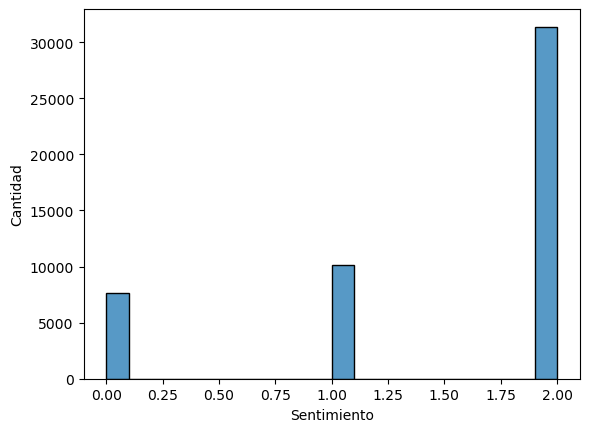

In [18]:

sns.histplot(df_reviews['sentiment_analysis'], bins=20)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

# Reducción de dimensionalidad y miramos los valores finales de los generos

In [21]:
#apilcando reduccion de dimensionalidad
def red_dim(df):
    df=df.drop(['item_id'],axis=1)
    # Sumar las columnas y crear un DataFrame
    sum_df = df.sum().reset_index()
    sum_df.columns = ['Genre', 'Count']
    # Convertir la columna "Count" a valores numéricos
    sum_df['Count'] = pd.to_numeric(sum_df['Count'], errors='coerce')
    # Ordenar el DataFrame por la columna "Count" de forma descendente
    sorted_df = sum_df.sort_values(by='Count', ascending=False)
    # Obtener los 20 géneros más comunes y sus recuentos
    top_20 = sorted_df.head(20)
    # Calcular el porcentaje de aparición de cada género
    total_count = top_20['Count'].sum()
    top_20['Percentage'] = (top_20['Count'] / total_count) * 100
    # Imprimir los resultados
    print(top_20)

In [22]:
red_dim(df_genres)

                    Genre    Count  Percentage
0                   Indie  15858.0   22.726361
1                  Action  11320.0   16.222878
2                  Casual   8282.0   11.869070
3               Adventure   8242.0   11.811746
4                Strategy   6957.0    9.970191
5              Simulation   6699.0    9.600447
6                     RPG   5479.0    7.852045
7            Free to Play   2031.0    2.910660
8            Early Access   1462.0    2.095216
9                  Sports   1257.0    1.801427
10  Massively Multiplayer   1108.0    1.587893
11                 Racing   1083.0    1.552065


C:\Users\lgtqa\AppData\Local\Temp\ipykernel_13980\1433727768.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['Percentage'] = (top_20['Count'] / total_count) * 100
